In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("vgsales.csv")

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [6]:
# the function of the rank column is not relevant for our purposes.
df = df.drop(columns="Rank", axis=1)

In [7]:
df["Length_of_Name"] = df["Name"].apply(lambda x: len(x))

In [8]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Length_of_Name
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,17
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,14
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,17
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,24


In [9]:
df["Length_of_Name"].corr(df["Global_Sales"])

-0.06983004679589692

In [10]:
df.dtypes

Name               object
Platform           object
Year              float64
Genre              object
Publisher          object
NA_Sales          float64
EU_Sales          float64
JP_Sales          float64
Other_Sales       float64
Global_Sales      float64
Length_of_Name      int64
dtype: object

In [11]:
df["Year"]

# transforming release year to actual year
# finding the most recent year
max_year = df["Year"].max()

df["How_Many_Years_Past"] = max_year - df["Year"]

df.head()

del df["Year"]
del df["Name"]

In [12]:
df.head()

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Length_of_Name,How_Many_Years_Past
0,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,10,14.0
1,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,17,35.0
2,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,14,12.0
3,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,17,11.0
4,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,24,24.0


In [13]:
platform_dict = dict(df["Platform"].value_counts())

In [14]:
df["Platform"] = df["Platform"].apply(lambda x: x if platform_dict[x] > 500 else "other" )

In [15]:
df["Platform"].value_counts()

other    2275
DS       2163
PS2      2161
PS3      1329
Wii      1325
X360     1265
PSP      1213
PS       1196
PC        960
XB        824
GBA       822
GC        556
3DS       509
Name: Platform, dtype: int64

In [16]:
# converting categorical variables to dummies
df = pd.get_dummies(df, columns=["Platform"])

In [17]:
df["Genre"].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [18]:
df["GenreCopy"] = df["Genre"]
df = pd.get_dummies(df, columns=["Genre"])

In [19]:
df.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Length_of_Name,How_Many_Years_Past,Platform_3DS,Platform_DS,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,Nintendo,41.49,29.02,3.77,8.46,82.74,10,14.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Nintendo,29.08,3.58,6.81,0.77,40.24,17,35.0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Nintendo,15.85,12.88,3.79,3.31,35.82,14,12.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Nintendo,15.75,11.01,3.28,2.96,33.00,17,11.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Nintendo,11.27,8.89,10.22,1.00,31.37,24,24.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
df["Publisher"].fillna("other", inplace= True)

publisher_dict = dict(df["Publisher"].value_counts())
publisher_dict["other"]

58

In [21]:
df["Publisher"] = df["Publisher"].apply(lambda x: x if publisher_dict[x] > 200 else "other")

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10.7,8.27)})

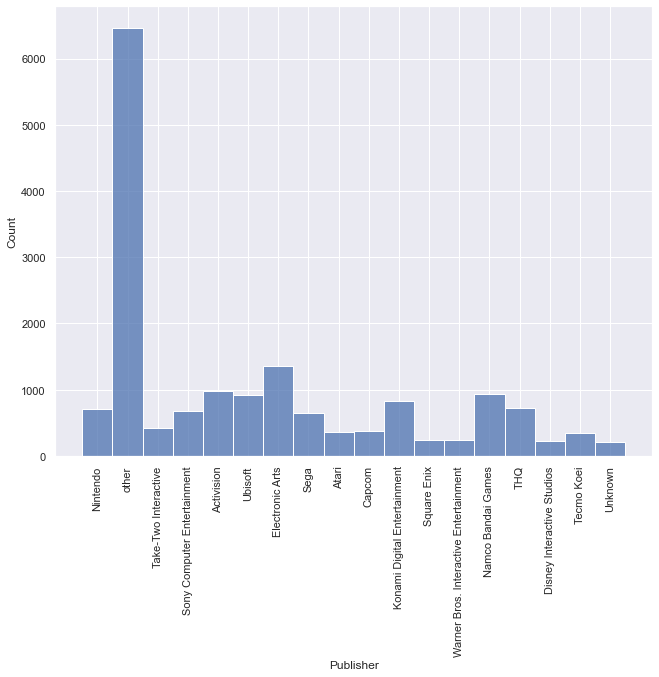

In [23]:
sns.histplot(df["Publisher"], bins=10)

plt.xticks(rotation=90)
plt.savefig("myfig")

In [24]:
df = pd.get_dummies(df, columns=["Publisher"])

In [25]:
df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Length_of_Name,How_Many_Years_Past,Platform_3DS,Platform_DS,Platform_GBA,...,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Unknown,Publisher_Warner Bros. Interactive Entertainment,Publisher_other
0,41.49,29.02,3.77,8.46,82.74,10,14.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29.08,3.58,6.81,0.77,40.24,17,35.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.85,12.88,3.79,3.31,35.82,14,12.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.75,11.01,3.28,2.96,33.00,17,11.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11.27,8.89,10.22,1.00,31.37,24,24.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df["How_Many_Years_Past"] = df["How_Many_Years_Past"].fillna(df["How_Many_Years_Past"].mean())

/var/folders/gp/2gy514kn7x9cyzpk5_yybkp40000gn/T/ipykernel_17492/1342462103.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


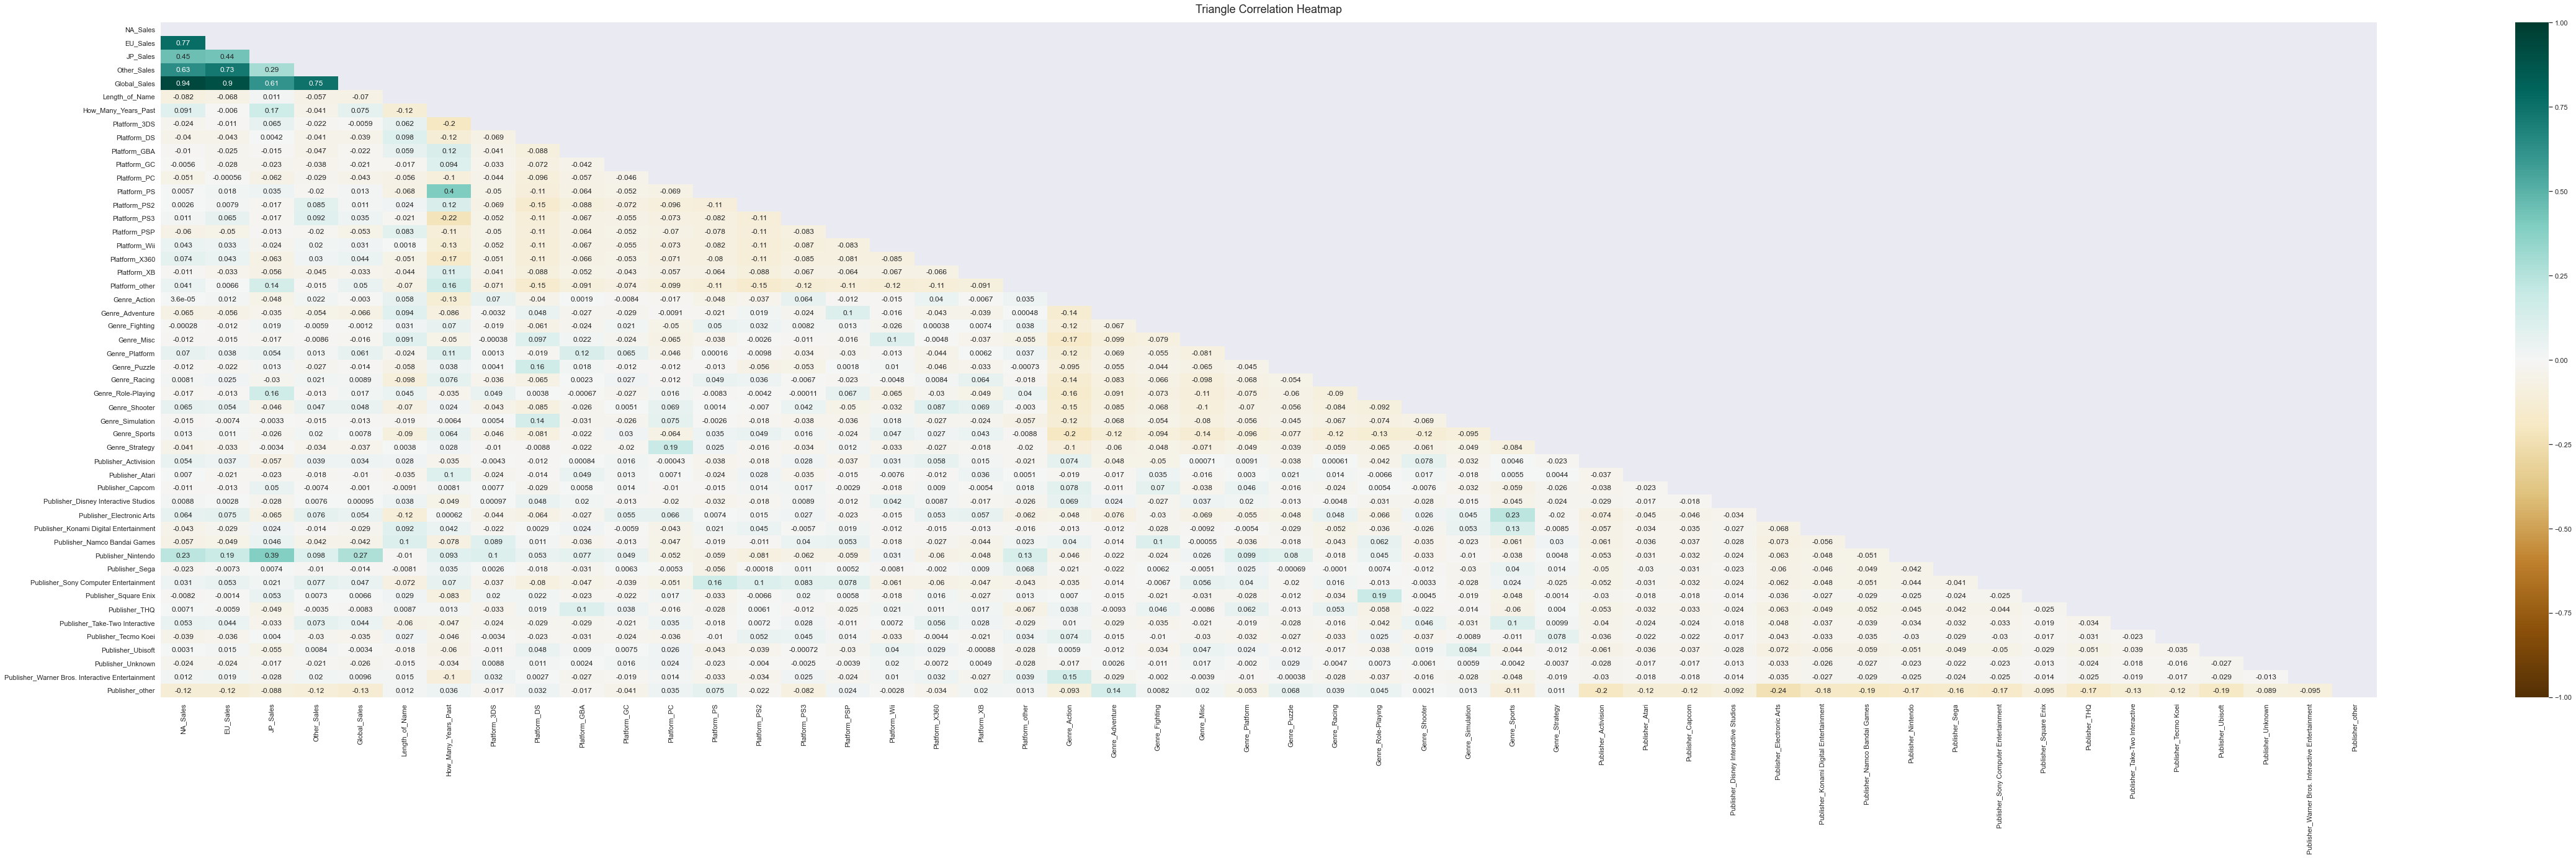

In [27]:
import numpy as np

plt.figure(figsize=(80, 20))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.savefig("heatmap_corr")

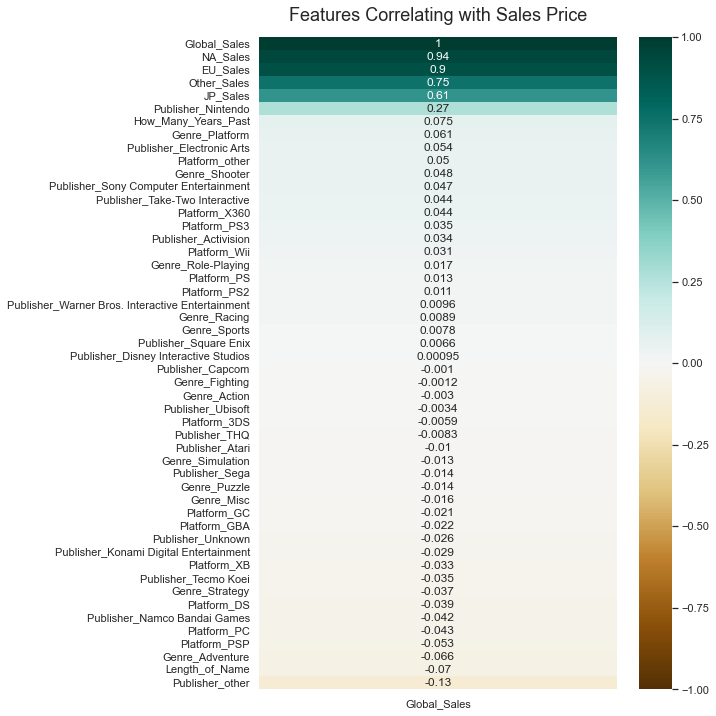

In [28]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Global_Sales']].sort_values(by='Global_Sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [29]:
df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Length_of_Name,How_Many_Years_Past,Platform_3DS,Platform_DS,Platform_GBA,...,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Unknown,Publisher_Warner Bros. Interactive Entertainment,Publisher_other
0,41.49,29.02,3.77,8.46,82.74,10,14.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29.08,3.58,6.81,0.77,40.24,17,35.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.85,12.88,3.79,3.31,35.82,14,12.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.75,11.01,3.28,2.96,33.00,17,11.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11.27,8.89,10.22,1.00,31.37,24,24.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
genrebycontinent = df.groupby("GenreCopy")["NA_Sales", "EU_Sales"].mean()
genrebycontinent

/var/folders/gp/2gy514kn7x9cyzpk5_yybkp40000gn/T/ipykernel_17492/1346590448.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genrebycontinent = df.groupby("GenreCopy")["NA_Sales", "EU_Sales"].mean()


,NA_Sales,EU_Sales
GenreCopy,,
Action,0.264726,0.158323
Adventure,0.082271,0.049868
Fighting,0.263667,0.119481
Misc,0.235906,0.124198
Platform,0.504571,0.227573
Puzzle,0.212680,0.087251
Racing,0.287766,0.190865
Role-Playing,0.219946,0.126384
Shooter,0.444733,0.239137


/var/folders/gp/2gy514kn7x9cyzpk5_yybkp40000gn/T/ipykernel_17492/2576903445.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("GenreCopy")["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"].mean().plot.bar()


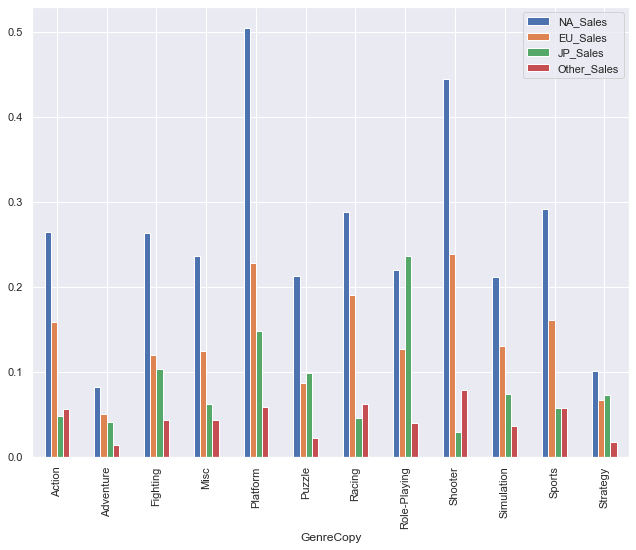

In [31]:
df.groupby("GenreCopy")["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"].mean().plot.bar()
plt.savefig("bar_comparison_withnormalization")

In [32]:
df2 = df.copy()

In [33]:
import pandas as pd
from sklearn import preprocessing
del df2["GenreCopy"]

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df2)
df2 = pd.DataFrame(x_scaled, columns=df2.columns)

In [34]:
df2.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Length_of_Name,How_Many_Years_Past,Platform_3DS,Platform_DS,Platform_GBA,...,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Unknown,Publisher_Warner Bros. Interactive Entertainment,Publisher_other
0,1.000000,1.000000,0.368885,0.800378,1.000000,0.068702,0.350,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.700892,0.123363,0.666341,0.072848,0.486281,0.122137,0.875,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.382020,0.443832,0.370841,0.313150,0.432854,0.099237,0.300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.379610,0.379394,0.320939,0.280038,0.398767,0.122137,0.275,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.271632,0.306340,1.000000,0.094607,0.379064,0.175573,0.600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df2["GenreCopy"] = df["GenreCopy"]


/var/folders/gp/2gy514kn7x9cyzpk5_yybkp40000gn/T/ipykernel_17492/1325661468.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby("GenreCopy")["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"].mean().plot.bar()


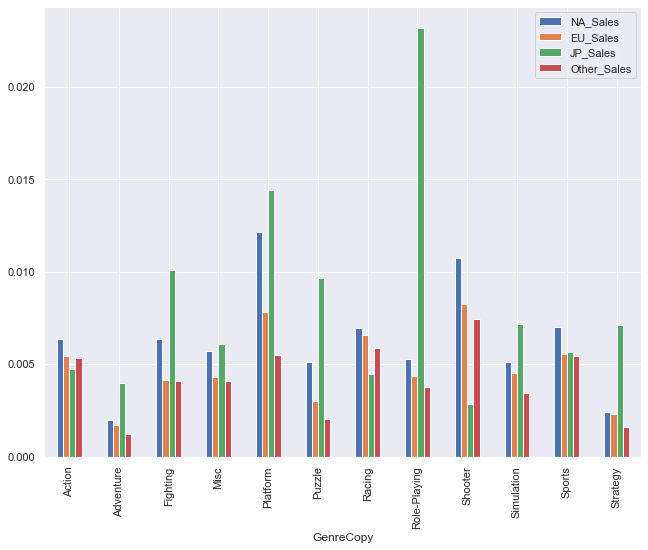

In [36]:
df2.groupby("GenreCopy")["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"].mean().plot.bar()
plt.savefig("bar_comparison_withnormalization2")

In [39]:
df['Global_Sales']

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16598, dtype: float64

In [51]:
X = df2.drop(["Global_Sales", "NA_Sales", "JP_Sales", "Other_Sales", "GenreCopy", "EU_Sales" ], axis=1)
y = df2["Global_Sales"]

from sklearn.preprocessing import PolynomialFeatures
poly_converter = PolynomialFeatures(degree=2, include_bias= False)
poly_features = poly_converter.fit_transform(X)
feature_names = poly_converter.get_feature_names(X.columns)


/Users/mac/Desktop/ZTM-ML/sample-project/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [65]:
poly_frame = pd.DataFrame(poly_features, columns=feature_names)

In [72]:
for i in poly_frame:
    if poly_frame[i].corr(y) < 0.40:
        del poly_frame[i]

In [ ]:
# for x1 in poly_frame:
#     for x2 in poly_frame:
#         if x1 != x2:
#             if poly_frame[x1].corr(poly_frame[x2]) > 0.9:
#                 del poly_frame[x1]

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_frame, y, test_size=0.3, random_state=101)

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [80]:
predictions = model.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, predictions))

In [82]:
RMSE

0.01570181126604518